In [ ]:
import pandas as pd
df = pd.read_csv('sharpness_results.txt', delimiter='\t')
print(df.describe())


        Laplacian    Tenengrad       Brenner           FFT
count  333.000000   333.000000  3.330000e+02  3.330000e+02
mean    11.580984   965.424096  5.773502e+07  6.961496e+10
std      4.122899   278.612868  1.576158e+07  9.733968e+09
min      3.111092   305.627105  2.732069e+07  4.696565e+10
25%      8.519739   762.432741  4.720485e+07  6.302666e+10
50%     11.050456   942.671787  5.559252e+07  7.035703e+10
75%     14.447638  1164.958829  6.566343e+07  7.690833e+10
max     23.940924  1667.465175  1.185927e+08  8.953630e+10


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('sharpness_results.txt', delimiter='\t')
image_names = df.iloc[:, 0]
numeric_df = df.iloc[:, 1:]
z_scores = (numeric_df - numeric_df.mean()) / numeric_df.std()

#combining
z_scores['combined_blur_score'] = 0.5 * z_scores['Laplacian'] + 0.5 * z_scores['Tenengrad']
result = pd.concat([image_names, z_scores], axis=1)
print(result.head())


  Image Name  Laplacian  Tenengrad   Brenner       FFT  combined_blur_score
0   0001.jpg   2.031099   1.636578  0.942019  1.261862             1.833839
1   0002.jpg   1.853564   1.553426  0.820156  1.183855             1.703495
2   0003.jpg   0.983653   0.878805  0.564728  0.758803             0.931229
3   0004.jpg   0.519773   0.540765 -0.233217  0.291718             0.530269
4   0005.jpg  -0.128678  -0.359005 -0.643003 -0.712798            -0.243842


In [14]:
result.describe()

,Laplacian,Tenengrad,Brenner,FFT,combined_blur_score
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,2.133762e-16,-4.054148e-16,-2.080418e-16,-5.494437e-16,-7.468167e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.927803e-01
min,-2.054353e+00,-2.368150e+00,-1.929649e+00,-2.326831e+00,-2.211252e+00
25%,-7.424981e-01,-7.285785e-01,-6.680907e-01,-6.768353e-01,-7.030444e-01
50%,-1.286783e-01,-8.166281e-02,-1.359322e-01,7.623547e-02,-1.071227e-01
75%,6.953008e-01,7.161720e-01,5.030212e-01,7.492700e-01,7.505378e-01
max,2.997876e+00,2.519773e+00,3.861136e+00,2.046580e+00,2.758824e+00


In [15]:
# Save to TXT file with tab delimiter
result.to_csv('sharpness_zscores.txt', sep='\t', index=False)

In [37]:
percent_to_remove = 60

# Calculate thresholds from the result DataFrame
laplacian_threshold = result['Laplacian'].quantile(percent_to_remove / 100)
tenengrad_threshold = result['Tenengrad'].quantile(percent_to_remove / 100)
combined_threshold = result['combined_blur_score'].quantile(percent_to_remove / 100)

# Filter sharper images
filtered_laplacian = result[result['Laplacian'] > laplacian_threshold]
filtered_tenengrad = result[result['Tenengrad'] > tenengrad_threshold]
filtered_combined = result[result['combined_blur_score'] > combined_threshold]

# Save to text files
filtered_laplacian.to_csv('filtered_laplacian.txt', index=False, sep='\t')
filtered_tenengrad.to_csv('filtered_tenengrad.txt', index=False, sep='\t')
filtered_combined.to_csv('filtered_combined.txt', index=False, sep='\t')


In [35]:
# Get image names from both filtered sets
laplacian_images = set(filtered_laplacian.iloc[:, 0])
tenengrad_images = set(filtered_tenengrad.iloc[:, 0])

# Images only in Tenengrad but not in Laplacian
only_in_tenengrad = tenengrad_images.difference(laplacian_images)

# Images only in Laplacian but not in Tenengrad
only_in_laplacian = laplacian_images.difference(tenengrad_images)

# Print the names
print("Images only in Tenengrad but not in Laplacian:")
for name in sorted(only_in_tenengrad):
    print(name)

print("\nImages only in Laplacian but not in Tenengrad:")
for name in sorted(only_in_laplacian):
    print(name)



Images only in Tenengrad but not in Laplacian:
0024.jpg
0048.jpg
0049.jpg
0050.jpg
0071.jpg
0135.jpg
0174.jpg
0243.jpg
0247.jpg
0267.jpg
0284.jpg
0292.jpg
0296.jpg
0319.jpg

Images only in Laplacian but not in Tenengrad:
0005.jpg
0017.jpg
0032.jpg
0037.jpg
0047.jpg
0093.jpg
0122.jpg
0202.jpg
0222.jpg
0227.jpg
0274.jpg
0283.jpg
0285.jpg
0305.jpg


In [33]:

laplacian_images = set(filtered_laplacian.iloc[:, 0]) 
tenengrad_images = set(filtered_tenengrad.iloc[:, 0])
combined_images = set(filtered_combined.iloc[:, 0])
common_images = tenengrad_images.intersection(combined_images)
print(len(common_images))
print(len(laplacian_images))


193
200


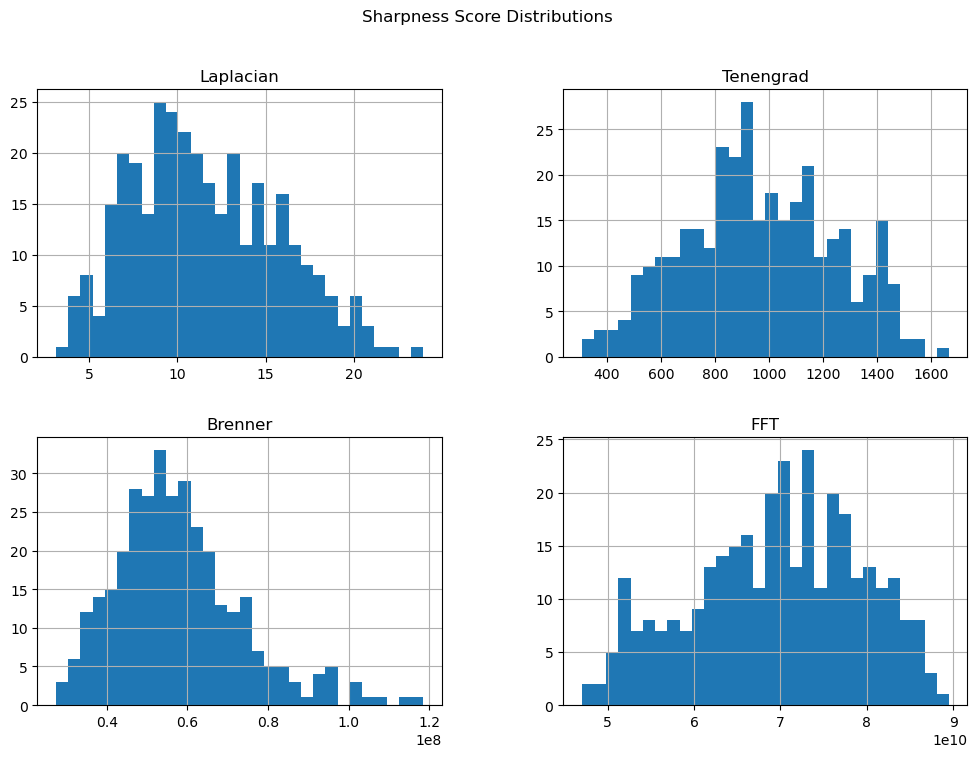

In [3]:
import matplotlib.pyplot as plt

# Plot histograms
df[['Laplacian', 'Tenengrad', 'Brenner', 'FFT']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Sharpness Score Distributions")
plt.show()


In [8]:
percent_to_remove = 40  
threshold = df['Laplacian'].quantile(percent_to_remove / 100)

filtered_df = df[df['Laplacian'] > threshold]  # Keep only sharper images

# Save the filtered results
filtered_df.to_csv('filtered_images.txt', index=False, sep='\t')


In [38]:
import pandas as pd
import shutil
import os


og_folder = "images/"  
filtered_folder = "tenengrad_filtered_images_60p/" 
os.makedirs(filtered_folder, exist_ok=True) 


filtered_df = pd.read_csv("filtered_tenengrad.txt", delimiter='\t')


for image_name in filtered_df["Image Name"]:
    src_path = os.path.join(og_folder, image_name)
    dest_path = os.path.join(filtered_folder, image_name)
    
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
        print(f"Copied: {image_name}")
    else:
        print(f"Missing: {image_name}")

print("Copying complete.")


Copied: 0001.jpg
Copied: 0002.jpg
Copied: 0003.jpg
Copied: 0004.jpg
Copied: 0006.jpg
Copied: 0009.jpg
Copied: 0015.jpg
Copied: 0016.jpg
Copied: 0018.jpg
Copied: 0019.jpg
Copied: 0028.jpg
Copied: 0029.jpg
Copied: 0030.jpg
Copied: 0031.jpg
Copied: 0033.jpg
Copied: 0034.jpg
Copied: 0035.jpg
Copied: 0036.jpg
Copied: 0039.jpg
Copied: 0040.jpg
Copied: 0041.jpg
Copied: 0044.jpg
Copied: 0046.jpg
Copied: 0051.jpg
Copied: 0052.jpg
Copied: 0053.jpg
Copied: 0054.jpg
Copied: 0055.jpg
Copied: 0057.jpg
Copied: 0058.jpg
Copied: 0060.jpg
Copied: 0061.jpg
Copied: 0063.jpg
Copied: 0065.jpg
Copied: 0066.jpg
Copied: 0067.jpg
Copied: 0068.jpg
Copied: 0069.jpg
Copied: 0070.jpg
Copied: 0074.jpg
Copied: 0076.jpg
Copied: 0078.jpg
Copied: 0079.jpg
Copied: 0080.jpg
Copied: 0082.jpg
Copied: 0083.jpg
Copied: 0089.jpg
Copied: 0091.jpg
Copied: 0092.jpg
Copied: 0096.jpg
Copied: 0097.jpg
Copied: 0099.jpg
Copied: 0103.jpg
Copied: 0108.jpg
Copied: 0111.jpg
Copied: 0112.jpg
Copied: 0115.jpg
Copied: 0116.jpg
Copied: 0118.j